# Environment Setup
## Import the libraries

In [1]:
import os

#data visualization packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

#keras packages
from keras.models import Sequential
from keras.layers import Dense

dimension = 28

## Load dataset

In [2]:
imgs_path = "Dataset/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(os.path.abspath(img_path + "/" + img))
        im = im.resize((dimension,dimension))
        im = im.convert('L')
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


# Data Preprocessing

## Data preparation

### Test-train split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training shape: ",x_train.shape, y_train.shape)
print("Testing shape: ",x_test.shape, y_test.shape)

Training shape:  (31367, 28, 28) (31367,)
Testing shape:  (7842, 28, 28) (7842,)


### Reshaping data

In [4]:
x_train = x_train.reshape(31367, dimension*dimension)
x_test = x_test.reshape(7842, dimension*dimension)
print("Training shape: ",x_train.shape, y_train.shape)
print("Testing shape: ",x_test.shape, y_test.shape)

Training shape:  (31367, 784) (31367,)
Testing shape:  (7842, 784) (7842,)


### Feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
x_train = minmax.fit_transform(x_train)
#transform testing dataset
x_test = minmax.transform(x_test)

## Data Visualisation

In [6]:
from random import randint
index = randint(0, len(x_train) - 1) # pick a random element from the train set
print(f"Pixel values range from {x_train[index].min()} to {x_train[index].max()}")
print(f"Shape of the image: {x_train[index].shape}")

Pixel values range from 0.048 to 0.856
Shape of the image: (784,)


In [7]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  43
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


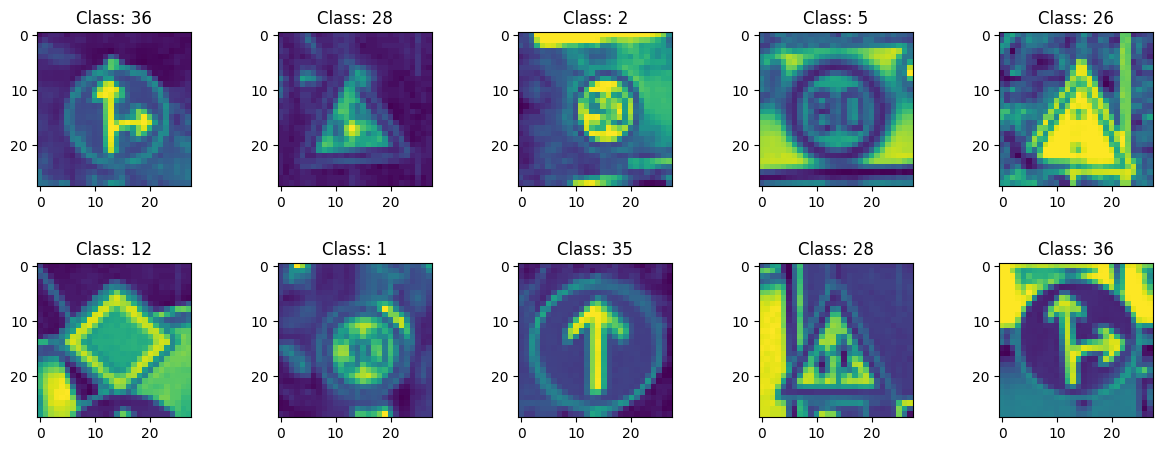

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15, 5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(dimension,dimension))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

# Building Model, Validation and Testing

## Initialise Model

In [9]:
#initializing model
model = Sequential()
#add 1st hidden layer
model.add(Dense(input_dim = x_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
model.add(Dense(units = len(np.unique(y_train)), kernel_initializer='uniform', activation='sigmoid'))
#compile the neural network
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 43)                11051     
                                                                 
Total params: 212,011
Trainable params: 212,011
Non-trainable params: 0
_________________________________________________________________


## Train and validate

In [10]:
history = model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
981/981 [==============================] - 2s 2ms/step - loss: 3.4532 - accuracy: 0.1180 - val_loss: 3.2997 - val_accuracy: 0.1729
Epoch 2/25
981/981 [==============================] - 2s 2ms/step - loss: 3.1598 - accuracy: 0.2520 - val_loss: 2.9546 - val_accuracy: 0.3142
Epoch 3/25
981/981 [==============================] - 2s 2ms/step - loss: 2.7810 - accuracy: 0.3616 - val_loss: 2.5767 - val_accuracy: 0.3951
Epoch 4/25
981/981 [==============================] - 2s 2ms/step - loss: 2.4349 - accuracy: 0.4204 - val_loss: 2.2835 - val_accuracy: 0.4420
Epoch 5/25
981/981 [==============================] - 2s 2ms/step - loss: 2.1576 - accuracy: 0.4721 - val_loss: 2.0397 - val_accuracy: 0.4967
Epoch 6/25
981/981 [==============================] - 2s 2ms/step - loss: 1.9280 - accuracy: 0.5227 - val_loss: 1.8339 - val_accuracy: 0.5418
Epoch 7/25
981/981 [==============================] - 2s 2ms/step - loss: 1.7358 - accuracy: 0.5730 - val_loss: 1.6566 - val_accuracy: 0.6043
Epoch 

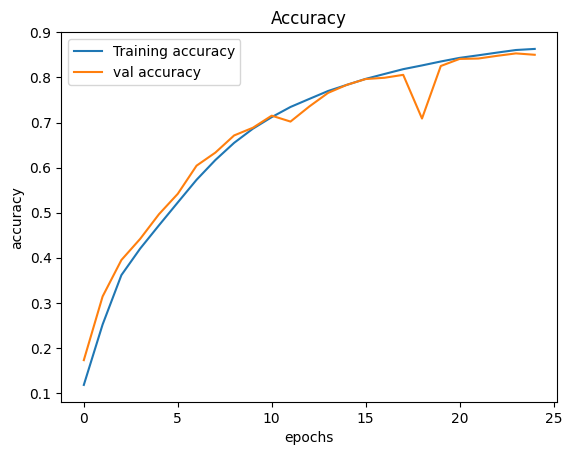

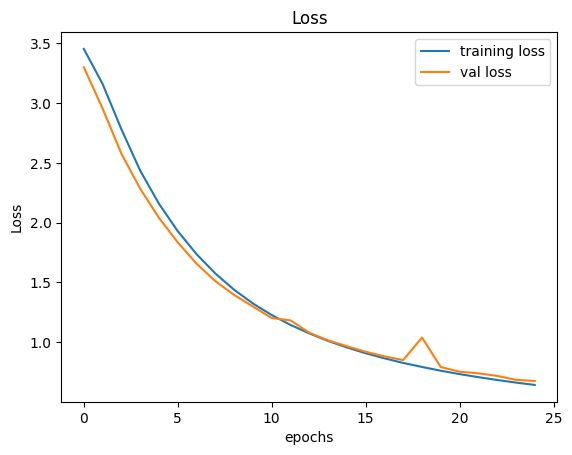

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing

In [12]:
from sklearn.metrics import accuracy_score

# Import images and labels from the test set
test = pd.read_csv("./Dataset/Test.csv")
test_labels = test['ClassId'].values
test_imgs = test['Path'].values
test_img_path = "./Dataset"
test_data = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((dimension,dimension))
    im = im.convert('L')
    im = np.array(im)
    test_data.append(im)

# convert to numpy array
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# reshape the data
print("Testing shape: ",test_data.shape, test_labels.shape)
test_data = test_data.reshape(12630, dimension*dimension)
print("Testing shape: ",test_data.shape, test_labels.shape)

# normalize the data
test_data = minmax.transform(test_data)

# predict the results
predict_x=model.predict(test_data)

# select the index with the maximum probability
classes_x=np.argmax(predict_x,axis=1)

# print the accuracy
print("accuracy: ", accuracy_score(test_labels, classes_x))

Testing shape:  (12630, 28, 28) (12630,)
Testing shape:  (12630, 784) (12630,)
395/395 [==============================] - 0s 990us/step
accuracy:  0.7158353127474267


# Extract Model weights

In [13]:
# processes file and saves proceed file
def process_file(file_name):
    total = ""
    basepath = "./Extracts/"
    with open(basepath + file_name + ".txt", "r") as f:
        texts = f.readlines()
        for text in texts:
            total += str(text.split(",")).replace("[", "{").replace("]", "}")
            total += ", "
    with open(basepath + file_name + "-proceed.txt", "w") as f:
        total = total.replace("'", "").replace("\\n", "")
        f.write(total)

In [14]:
# layer 1 weights
np.savetxt('./Extracts/weights_layer1.txt', model.get_weights()[0] ,fmt='%1.4e', delimiter=',')
# layer 1 bias
np.savetxt('./Extracts/bias_layer1.txt', model.get_weights()[1] ,fmt='%1.4e', delimiter=',')
# layer 2 weights
np.savetxt('./Extracts/weights_layer2.txt', model.get_weights()[2] ,fmt='%1.4e', delimiter=',')
# layer 2 bias
np.savetxt('./Extracts/bias_layer2.txt', model.get_weights()[3] ,fmt='%1.4e', delimiter=',')

# process files to copy to cpp
process_file("weights_layer1")
process_file("bias_layer1")
process_file("weights_layer2")
process_file("bias_layer2")

## Save sample image

In [15]:
np.savetxt('./Extracts/sample_image.txt', x_train[0] ,fmt='%1.4e', delimiter=',')
process_file("sample_image")